In [1]:
import numpy as np
import pandas as pd

In [2]:
hd = pd.read_html('https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv')[0].iloc[:,1:]

In [3]:
data = hd.copy()

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#creating feature and target with shuffle data

In [7]:
data_shuffle = data.sample(frac=1)

In [8]:
featured_x = data_shuffle.drop('target',axis=1)
target_y = data_shuffle['target']

In [9]:
## SkLearn

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
clf = RandomForestClassifier()

In [12]:
######## Getting ready for hyperparameter

In [13]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
## hyperparameter
hype_dict = {
    'n_estimators':[100,200,500,1200],
    'max_depth':[None,5,10,20,30],
    'max_features':['auto','sqrt'],
    'min_samples_split':[2,4,6],
    'min_samples_leaf': [1,2,4]
}

In [15]:
#train_test_split and predict

In [16]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [17]:
x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y)

In [18]:
np.random.seed(12)
clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(estimator=clf,param_distributions=hype_dict,n_iter=10,cv=5,verbose=2)

rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_s

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=500, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   38.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500, 1200]},
                   verbose=2)

In [19]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [20]:
##########################
#
# GridSearchCV()
#
###########################

In [21]:
#getting the best params
hype_dict_grid = {'n_estimators':[100,200],
                  'min_samples_split':[4,6],
                  'min_samples_leaf':[1,4],
                  'max_features':['auto'],
                  'max_depth':[None,30]}
                  

In [22]:
from sklearn.model_selection import GridSearchCV


In [23]:
np.random.seed(12)

clf2 = RandomForestClassifier()

grid_clf = GridSearchCV(estimator=clf2,param_grid=hype_dict_grid,cv=5,verbose=2 )



In [24]:
grid_clf.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=None, max_features=

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.2s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   19.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 30], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [100, 200]},
             verbose=2)

In [25]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 200}

In [26]:
################################################
# Getting Prediction results

In [27]:
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    data_dict = { 'Accuracy': round(accuracy,2),
                'Precision': round(precision,2),
                'Recall': round(recall,2),
                'f1':round(f1,2)}
    print(f'Accuracy:{accuracy*100:.2f}%')
    print(f'Precision:{precision:.2f}')
    print(f'Recall:{recall:.2f}')
    print(f'f1:{f1:.2f}')
    
    return data_dict

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [29]:
## Prediction on RadndomizedSearchCV

In [30]:
rs_preds = rs_clf.predict(x_test)

rs_metrics = evaluate_preds(y_test,rs_preds)

Accuracy:86.84%
Precision:0.84
Recall:0.93
f1:0.88


In [31]:
## Prediction on GridSearchCV

In [32]:
grid_preds = grid_clf.predict(x_test)

grid_metrics = evaluate_preds(y_test,grid_preds)

Accuracy:85.53%
Precision:0.84
Recall:0.90
f1:0.87


In [33]:
## BaseLine Prediction

In [34]:
np.random.seed(11)

base_clf = RandomForestClassifier()

base_clf.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
#prediction

In [36]:
base_preds = base_clf.predict(x_test)

In [37]:
base_metrics = evaluate_preds(y_test,base_preds)

Accuracy:85.53%
Precision:0.85
Recall:0.88
f1:0.86


In [38]:
##########################################
#
#COMPARE THEM WITH A PLOT

In [39]:
compare_metrics = pd.DataFrame({'Random Search':rs_metrics,
                               'Grid Search': grid_metrics,
                               'Baseline': base_metrics})

In [40]:
compare_metrics

,Random Search,Grid Search,Baseline
Accuracy,0.87,0.86,0.86
Precision,0.84,0.84,0.85
Recall,0.92,0.90,0.88
f1,0.88,0.87,0.86


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

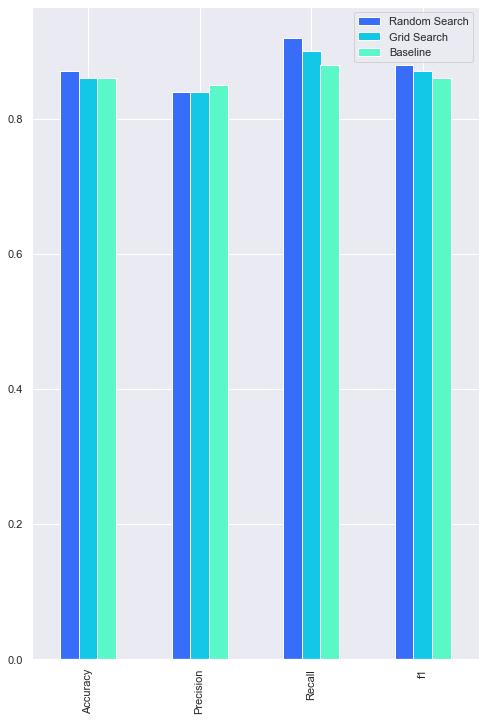

In [42]:
compare_metrics.plot.bar(figsize=(8,12));

In [43]:
######################################################################
#SAVING THE BEST MODEL #GRIDSEARCHCV

In [44]:
import pickle

In [45]:
pickle.dump(grid_clf,open('grid_random_forest.pkl','wb'))

In [46]:
#
load_model = pickle.load(open('grid_random_forest.pkl','rb'))

In [47]:
#prediction with the model

In [48]:
load_preds  = load_model.predict(x_test)

In [49]:
load_preds

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [50]:
#evaluate

In [51]:
evaluate_preds(y_test,load_preds)

Accuracy:85.53%
Precision:0.84
Recall:0.90
f1:0.87


{'Accuracy': 0.86, 'Precision': 0.84, 'Recall': 0.9, 'f1': 0.87}

In [52]:
################# JOBLIB ##################################

In [53]:
from joblib import dump,load

In [54]:
dump(grid_clf,filename='grid_random_forest.joblib')

['grid_random_forest.joblib']

In [55]:
#load joblib

In [56]:
joblib_model = load(filename='grid_random_forest.joblib')

In [57]:
#prediction

In [58]:
joblib_preds = joblib_model.predict(x_test)

In [59]:
#evaluate

In [60]:
evaluate_preds(y_test,joblib_preds)

Accuracy:85.53%
Precision:0.84
Recall:0.90
f1:0.87


{'Accuracy': 0.86, 'Precision': 0.84, 'Recall': 0.9, 'f1': 0.87}